In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np

from stuff import plotter
from stuff import stuff
import scipy as sp
from scipy.interpolate import interp1d
from scipy import signal
from scipy.optimize import curve_fit
from stuff import detect_peaks
import scipy.optimize as opt
from scipy.signal import savgol_filter
from mpl_toolkits.axes_grid.anchored_artists import AnchoredText
from pylab import *
import os
%config InlineBackend.figure_format = 'retina'

Fitting class


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


# Data analysis 

-[x] Plot the data of all Raman spectra against the relative wave number relating to the 
laser line.



$$k = \frac{\omega}{c} = {2\pi \over \lambda}$$


$$\omega = 2\pi \nu = 2\pi \frac{c}{\lambda}$$

-[x] Convert the wave length of the lines into relative wave numbers


-[x] Calculate the Boltzmann constant from the intensity relations of Stokes- and Antistokes lines of for all samples.

------

-[x] Match the unknown probes no. 3-5 to the substances CDCl3, CHBr3 and CDBr3 by comparing them to the known substances and applying the isotope effect.

Isotopic shifts are best known and most widely used in vibration spectroscopy where the shifts are large, being proportional to the ratio of the square root of the isotopic masses. In the case of hydrogen, the "H-D shift" is (1/2)1/2 or 1/1.41. Thus, the (totally symmetric) C-H vibration for CH
4 and CD
4 occur at 2917 cm−1 and 2109 cm−1, respectively.[5] This shift reflects the differing Reduced mass for the affected bonds.

-[x] Calculate the degree of polarization of the Raman lines and asign the Raman lines to the normal modes of the investigated molecules.

-[ ] Calculate the temperature for the A1-vibration of CCl4, where Stokes and Antistokes lines would have the same intensity.

In [3]:
# def funcGauss(w, *params):
#     y = np.zeros_like(w)
#     for i in range(0, len(params), 4):
#         dw = params[i]
#         b = params[i+1]
#         w_0 = params[i+2]
#         a = params[i+3]
#         y = y + a + dw * b/((w - w_0)**2 + dw**2/4)
#     return y
    

In [4]:
# def gauss_function(x, a, x0, sigma):
#     return a*np.exp(-(x-x0)**2/(2*sigma**2))

In [79]:
folder = "/Users/vladislavbushmakin/GoogleDisk/PhysicsMasters/AdvancedPhysicsLabs/uniStuttgartLabs/RamanEffect/RamanData/"
dataFiles = [i for i in os.listdir(folder) if '.dat' in i]

In [80]:
task3Files = [i for i in dataFiles if 'ask3' in i]

In [81]:
task3Files[0]

'task3B.dat'

In [82]:
dt = np.dtype([('freq', int), ('intens', float)])

In [83]:
taskFiles = [i for i in dataFiles if 'LP' in i][1:]

In [84]:
taskFiles

['task5sample4LP.dat',
 'task4sample2LP.dat',
 'task5sample2LP.dat',
 'task4sample4LP.dat',
 'task5sample5LP.dat',
 'task4sample3LP.dat',
 'task5sample3LP.dat',
 'task4sample5LP.dat']

In [85]:
a = [int(s) for s in taskFiles[1].split() if s.isdigit()]

In [86]:
taskFiles[0]

'task5sample4LP.dat'

In [87]:
list(filter(str.isdigit, taskFiles[1]))[1]

'2'

In [88]:
data_sample = np.fromfile(folder + taskFiles[0], dtype=dt)
data_sample_freq = [i[0] for i in data_sample]
data_sample_intens = [i[1] for i in data_sample]

In [89]:
data_sample_freq[0]

642054459367098629

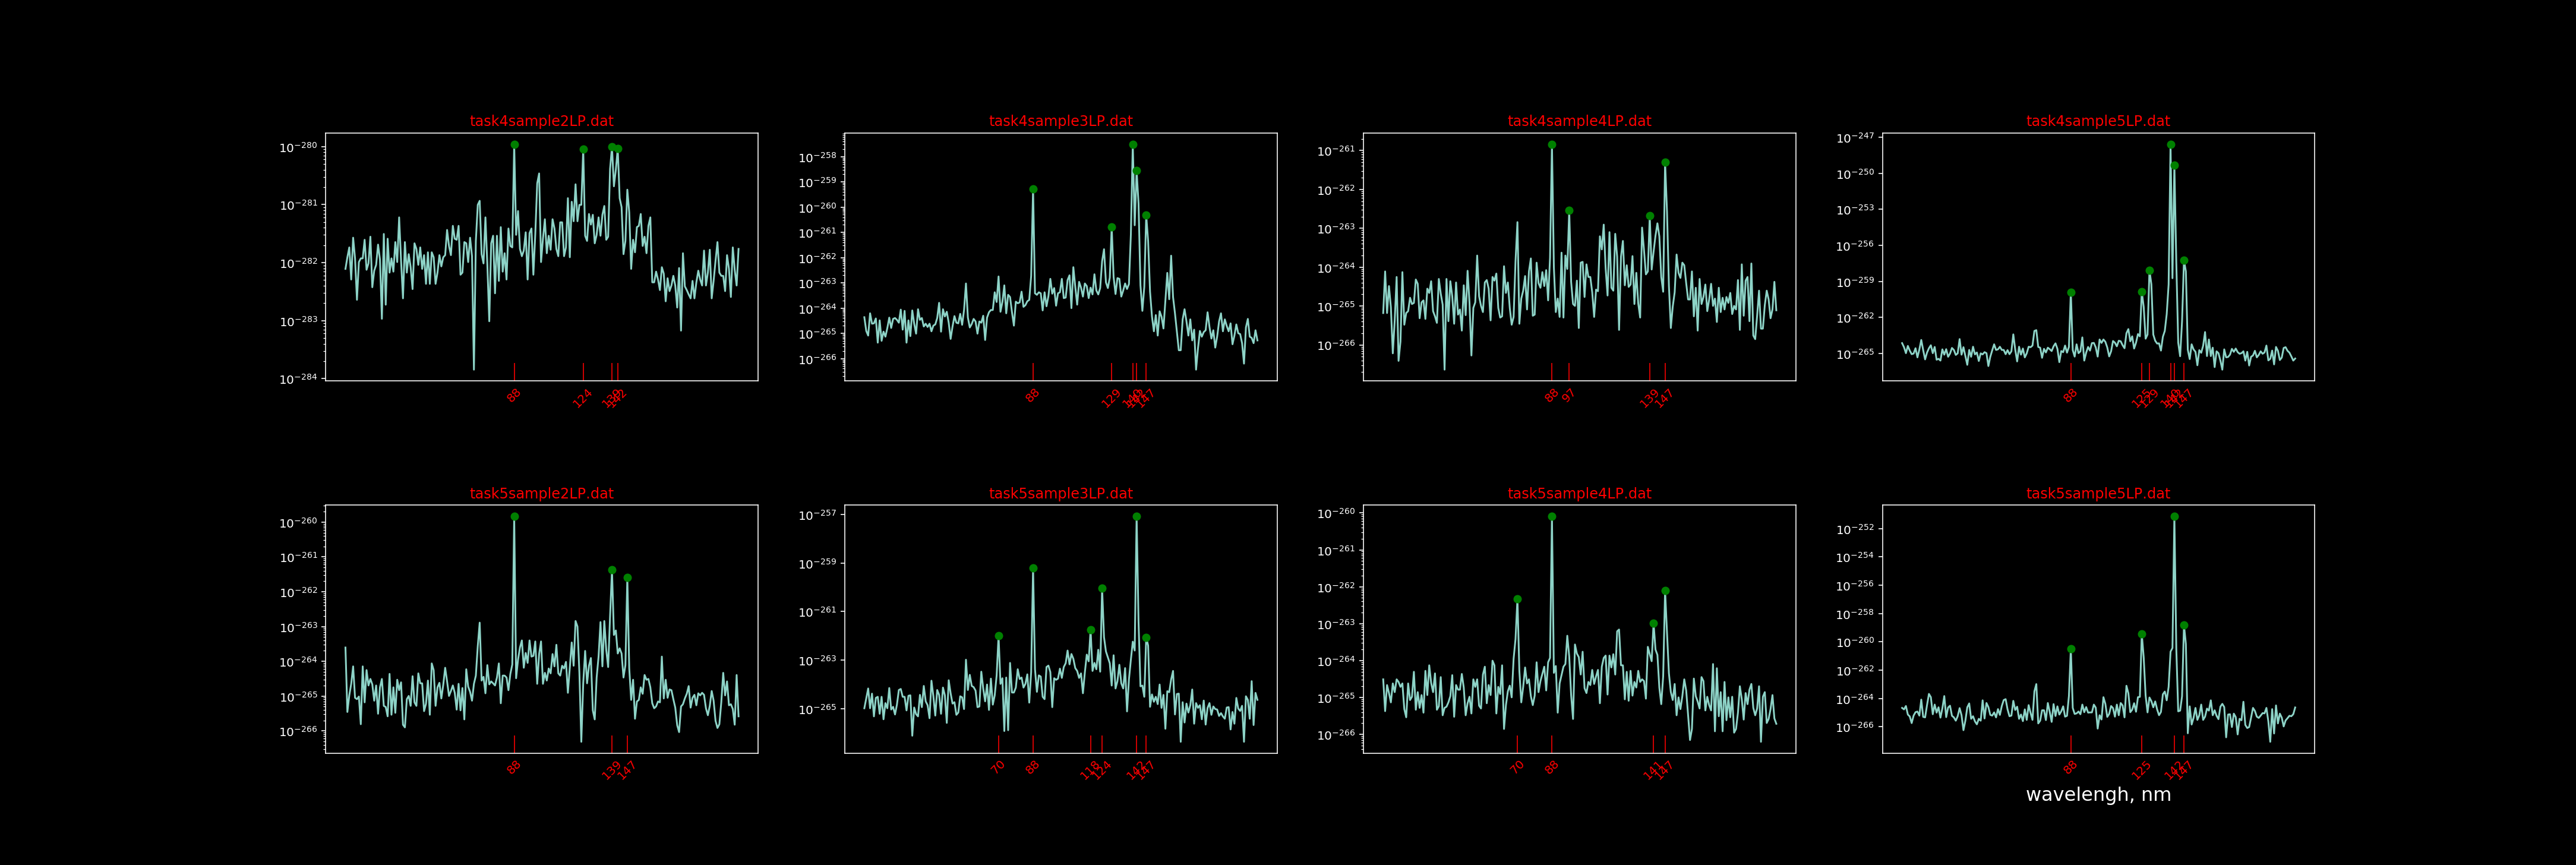

In [90]:
fig, axs = plt.subplots(2, 4, constrained_layout=True, figsize=(30, 10))
plt.subplots_adjust(hspace=0.5)
# st = fig.suptitle(r"CCl$_{4}$", fontsize=25, color='red')

graphNames = []
peakMax = [[3, 1e4, 1e2, 5*1e14],[1e3, 1e5, 1e3, 5*1e11]]



peaksPix = data_sample_intens[130:300]
peaksPix_2 = data_sample_intens[130:300]
x = range(len(data_sample))
lines = np.array(x)
sample = []
sample_2 = []

for i in taskFiles:
    data_from_file = np.fromfile(folder + i, dtype=dt)#[:len(data_sample)-1] 
    freqs = np.array([i[0] for i in data_from_file])
    data=np.array([i[1] for i in data_from_file])
    
#     data = savgol_filter(data, 3,1)
    idx_j=int(list(filter(str.isdigit, i))[1]) - 2
    if "task4" in i:
        idx=0
    if "task5" in i:
        idx=1
  
    
    peaks = detect_peaks.detect_peaks(data, mph=max(data)/peakMax[idx][idx_j], mpd=1)
    
    if idx==0:
        lines = (np.array([i in peaks for i in x]))[130:300]
        peaksPix = np.vstack((peaksPix, lines))
        sample = sample + [idx_j + 2]
    if idx==1:
        lines = (np.array([i in peaks for i in x]))[130:300]
        peaksPix_2 = np.vstack((peaksPix, lines))
        sample_2 = sample_2 + [idx_j + 2]
    
    subPlot = axs[idx][idx_j]
    subPlot.semilogy(data, '-')
    subPlot.set_title(i, color='red', size=12)
    subPlot.semilogy(peaks, data[peaks], 'og')
    subPlot.xaxis.set_ticks(peaks)
#     subPlot.xaxis.set_ticklabels(freqs[peaks])
    subPlot.tick_params(axis='x', colors='red', size=15, rotation=45, direction='in')
    
plt.xlabel('wavelengh, nm', fontsize=16)
fig.subplots_adjust(top=0.85)
# fig.
# fig.suptitle('Task3', fontsize=16)
fig.savefig('allGraphs.png', dpi=300)
plt.show()

In [91]:
import codecs

In [277]:
dataFiles = [i for i in os.listdir(folder) if '.asc' in i]
taskFiles = [i for i in dataFiles if 'Green' in i][1:]
taskFiles = [i for i in taskFiles if 'No Sample' not in i]
taskFiles = taskFiles + ['Sample 4, 90 Deg, Green.asc']

In [278]:
with codecs.open(folder + taskFiles[0], encoding='utf-8-sig') as f:
        X_test = np.array([[float(x) for x in line.split()] for line in f])
    
    
freqs = X_test[:,0]
data_t = X_test[:,1] 



In [279]:
# plt.style.use('dark_background')
fig, axs = plt.subplots(1, 5, constrained_layout=True, figsize=(30, 10))
plt.subplots_adjust(hspace=0.5)
# st = fig.suptitle(r"CCl$_{4}$", fontsize=25, color='red')

graphNames = []
left_peakMax = [[1.1, 1.1, 1.1, 1.11, 1.1],
                [1.1, 1.1, 1.1, 1.1, 1.1]]

right_peakMax = [[1.14, 1.1, 1.4, 1.1, 1.45],
                 [1.07, 1.1, 1.2, 1.1, 1.6]]

with codecs.open(folder + taskFiles[0], encoding='utf-8-sig') as f:
        X_test = np.array([[float(x) for x in line.split()] for line in f])
    
    
freqs = X_test[:,0]
data_t = X_test[:,1] 

peaksPix = data_t
peaksPix_2 = data_t
x = range(len(data_t))
lines = np.array([i in peaks for i in x])
sample = []
sample_2 = []
for i in taskFiles:
    with codecs.open( folder + i, encoding='utf-8-sig') as f:
        X = np.array([[float(x) for x in line.split()] for line in f])    
    freqs = X[:,0]
    data = X[:,1]
    idx_j=int(list(filter(str.isdigit, i))[0]) - 1
#     if " 0 Deg" in i:
#         idx=0
#     if " 90 Deg" in i:
#         idx=1    
#     left_peaks = detect_peaks.detect_peaks(data[:800], mph=max(data[:800])/left_peakMax[idx][idx_j], mpd=25)
#     right_peaks = np.array(detect_peaks.detect_peaks(data[800:], mph=max(data[800:])/right_peakMax[idx][idx_j], mpd=25)) + 800
#     peaks = list(left_peaks) + list(right_peaks)
#     peaks = list(map(lambda x: int(x), peaks))
#     if idx==0:
#         lines=data
#         peaksPix = np.vstack((peaksPix, lines))
#         sample = sample + [idx_j + 1]
#     if idx==1:
#         lines=data
#         peaksPix_2 = np.vstack((peaksPix, lines))
#         sample_2 = sample_2 + [idx_j + 1]    
    subPlot = axs[idx_j]
    subPlot.semilogy(data, '-')
    subPlot.set_title(i, size=12)
#     subPlot.semilogy(peaks, data[peaks], 'og')
#     subPlot.xaxis.set_ticks(peaks)
    subPlot.xaxis.set_ticklabels(np.array([np.round(1e7*(1/i - 1/(632.17)),1) for i in freqs[peaks]]))
    subPlot.tick_params(axis='both', size=15, rotation=90, direction='in')
plt.xlabel('wavelengh, nm', fontsize=16)
fig.subplots_adjust(top=0.85)
fig.savefig('allGraphs_.png', dpi=300)
plt.show()

In [273]:
dataFiles = [i for i in os.listdir(folder) if '.asc' in i]
taskFiles = [i for i in dataFiles if ' 0 Deg, Green' in i][1:]
taskFiles = [i for i in taskFiles if 'No Sample' not in i]
taskFiles = taskFiles + ['Sample 4, 0 Deg, Green.asc']

In [274]:
taskFiles

['Sample 1, 0 Deg, Green.asc',
 'Sample 5, 0 Deg, Green.asc',
 'Sample 3, 0 Deg, Green.asc',
 'Sample 2, 0 Deg, Green.asc',
 'Sample 4, 0 Deg, Green.asc']

In [275]:
# plt.style.use('dark_background')
fig, axs = plt.subplots(1, 5, constrained_layout=True, figsize=(30, 5))
plt.subplots_adjust(hspace=0.5)
with codecs.open(folder + taskFiles[0], encoding='utf-8-sig') as f:
        X_test = np.array([[float(x) for x in line.split()] for line in f])
freqs = X_test[:,0]
data_t = X_test[:,1] 
peaksPix = data_t
x = range(len(data_t))
lines = np.array([i in peaks for i in x])
sample = []
for i in taskFiles:
    with codecs.open( folder + i, encoding='utf-8-sig') as f:
        X = np.array([[float(x) for x in line.split()] for line in f])
    freqs = X[:,0]
    data = X[:,1]
    idx_j=int(list(filter(str.isdigit, i))[0]) - 1 
    if " 90 Deg" in i:
        idx=0
    if idx==0:
        lines=data
        peaksPix = np.vstack((peaksPix, lines))
        sample = sample + [idx_j + 1]
    tickRange = list(map(lambda x: int(x), np.linspace(0, len(freqs)- 1, 10))) + [0]
    subPlot = axs[idx_j]
    subPlot.plot(data, '-')
    subPlot.set_title(i, size=12)
    subPlot.xaxis.set_ticks(tickRange + [1185])
    subPlot.xaxis.set_ticklabels(np.array([np.round(1e7*(1/i - 1/(632.17)),1) for i in freqs[tickRange]] + [0]))
    subPlot.tick_params(axis='both', size=15, rotation=45, direction='in')
    subPlot.xaxis.set_label(r'$\Delta \nu$ cm$^{-1}$')
    subPlot.tick_params(axis='x', rotation=90) 
fig.subplots_adjust(top=0.85)
fig.tight_layout()
fig.savefig('allGraphs_90Deg.png', dpi=300)
plt.show()

In [168]:
grid[0]

array([4597., 4512., 4612., ..., 4593., 4533., 4648.])

In [169]:
grid=peaksPix[1:]

In [170]:
grid

array([[4697., 4689., 4677., ..., 4622., 4615., 4681.],
       [4548., 4632., 4664., ..., 4722., 4634., 4690.],
       [4661., 4645., 4725., ..., 4708., 4605., 4624.],
       [4690., 4672., 4714., ..., 4653., 4630., 4599.],
       [4704., 4681., 4743., ..., 4609., 4552., 4708.]])

In [171]:
grid_new = []

In [178]:
grid_new = np.array([grid[0]] + [grid[1]] + [grid[4]] + [np.array(grid[3])] + [grid[2]])

In [179]:
# grid_new

In [271]:
plt.style.use('dark_background')
# grid=peaksPix[1:]
grid = grid_new
sample = list(range(grid.shape[0]))
norm = cm.colors.Normalize(vmax=np.max(grid), vmin=np.min(grid))
plt.imshow(grid, cmap=cm.binary, aspect='auto', norm=norm)
# plt.axvline(1185, color='r', linestyle='dashed')
# plt.yticks(range(grid.shape[0]), [f'$90^o$ sample {i + 1}' for i in sample])
sample = [r'CCl$_4$',
r'CHCl$_3$',
r'CDCl$_3$',
r'CHBr$_3$',
r'CDBr$_3$',
]
plt.yticks(range(grid.shape[0]), [f'{i}' for i in sample])
tickRange = list(map(lambda x: int(x), np.linspace(0, len(freqs)- 1, 10))) + [0]
plt.tick_params(axis='x', rotation=90) 
plt.tick_params(axis='y')
plt.xticks(tickRange + [1185], np.array([np.round(1e7*(1/i - 1/(632.17)),1) for i in freqs[tickRange]] + [0]))
plt.xlabel(r'$\Delta$ $\nu$, cm$^{-1}$')
plt.tight_layout()
plt.savefig('Polarization_90Deg_only.png', dpi=300)

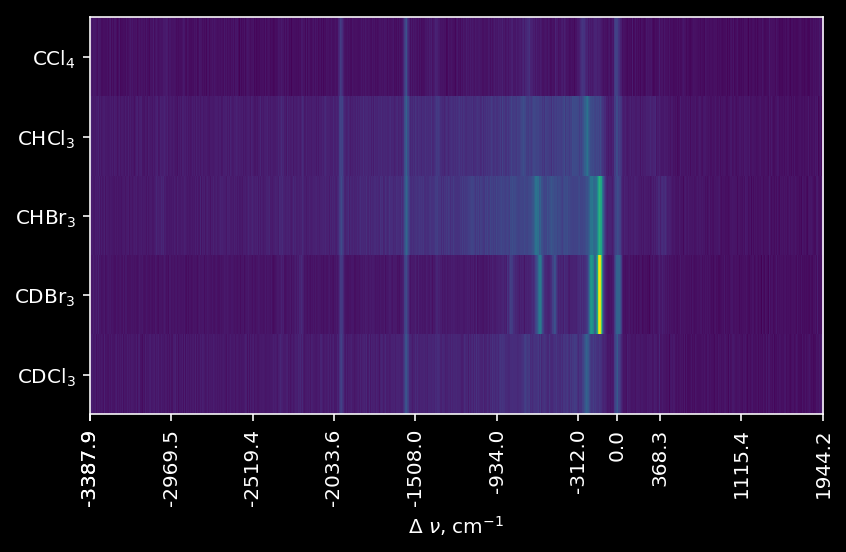

In [156]:
plt.style.use('dark_background')
grid=peaksPix[1:]
sample = list(range(grid.shape[0]))
norm = cm.colors.Normalize(vmax=np.max(grid), vmin=np.min(grid))
plt.imshow(grid, cmap=cm.viridis, aspect='auto', norm=norm)
# plt.axvline(1185, color='r', linestyle='dashed')
# plt.yticks(range(grid.shape[0]), [f'$90^o$ sample {i + 1}' for i in sample])
sample = [r'CCl$_4$',
r'CHCl$_3$',
r'CHBr$_3$',
r'CDBr$_3$',
r'CDCl$_3$']
plt.yticks(range(grid.shape[0]), [f'{i}' for i in sample])
tickRange = list(map(lambda x: int(x), np.linspace(0, len(freqs)- 1, 10))) + [0]
plt.tick_params(axis='x', rotation=90) 
plt.tick_params(axis='y')
plt.xticks(tickRange + [1185], np.array([np.round(1e7*(1/i - 1/(632.17)),1) for i in freqs[tickRange]] + [0]))
plt.xlabel(r'$\Delta$ $\nu$, cm$^{-1}$')
plt.tight_layout()
plt.savefig('Polarization_90Deg_only.png', dpi=300)

In [50]:
dataFiles = [i for i in os.listdir(folder) if '.asc' in i]
taskFiles = [i for i in dataFiles if '90 Deg, Green' in i][1:]
taskFiles = [i for i in taskFiles if 'No Sample' not in i]
taskFiles = taskFiles + ['Sample 4, 0 Deg, Green.asc']

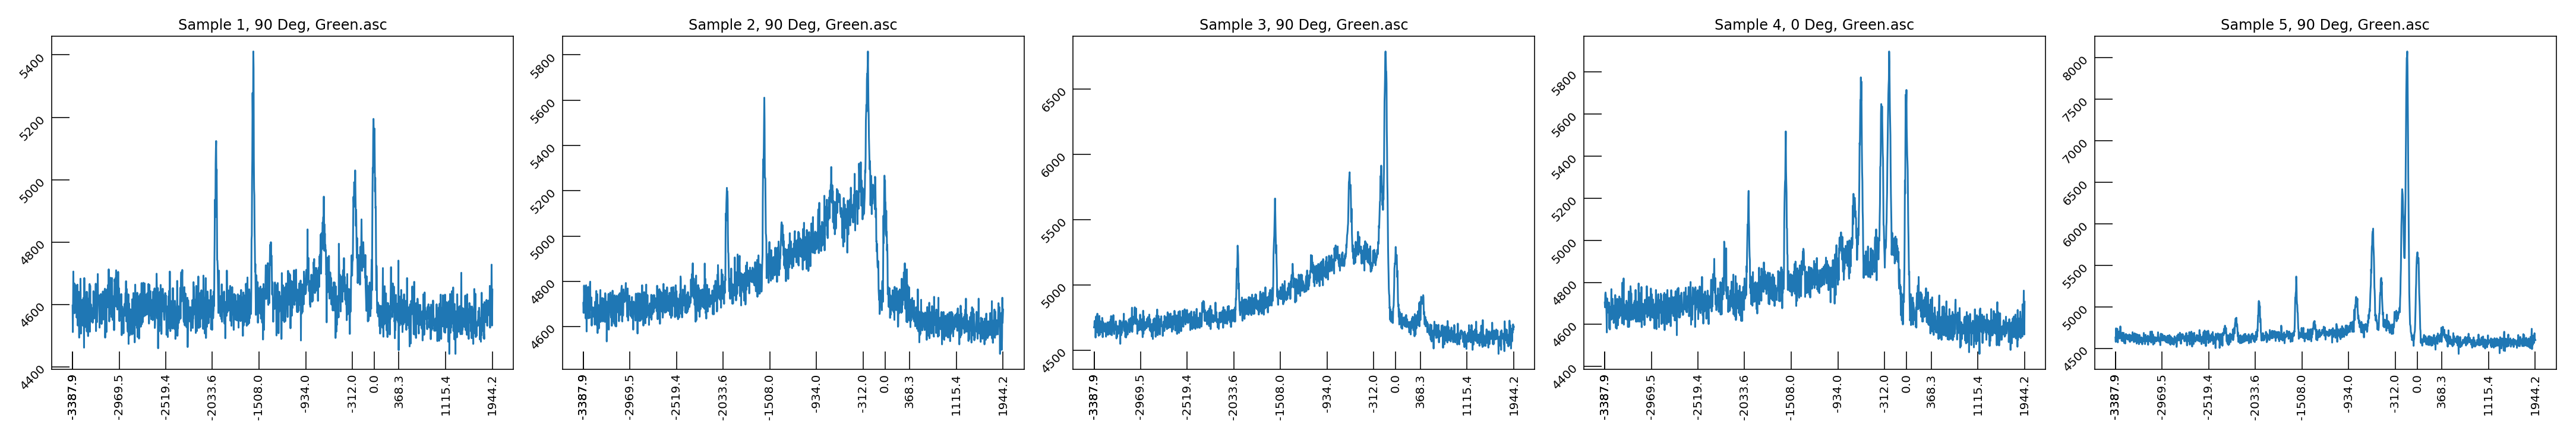

In [51]:
# plt.style.use('dark_background')
fig, axs = plt.subplots(1, 5, constrained_layout=True, figsize=(30, 5))
plt.subplots_adjust(hspace=0.5)
with codecs.open(folder + taskFiles[0], encoding='utf-8-sig') as f:
        X_test = np.array([[float(x) for x in line.split()] for line in f])
freqs = X_test[:,0]
data_t = X_test[:,1] 
peaksPix = data_t
x = range(len(data_t))
lines = np.array([i in peaks for i in x])
sample = []
for i in taskFiles:
    with codecs.open( folder + i, encoding='utf-8-sig') as f:
        X = np.array([[float(x) for x in line.split()] for line in f])
    freqs = X[:,0]
    data = X[:,1]
    idx_j=int(list(filter(str.isdigit, i))[0]) - 1 
    if " 90 Deg" in i:
        idx=0
    if idx==0:
        lines=data
        peaksPix = np.vstack((peaksPix, lines))
        sample = sample + [idx_j + 1]
    tickRange = list(map(lambda x: int(x), np.linspace(0, len(freqs)- 1, 10))) + [0]
    subPlot = axs[idx_j]
    subPlot.plot(data, '-')
    subPlot.set_title(i, size=12)
    subPlot.xaxis.set_ticks(tickRange + [1185])
    subPlot.xaxis.set_ticklabels(np.array([np.round(1e7*(1/i - 1/(632.17)),1) for i in freqs[tickRange]] + [0]))
    subPlot.tick_params(axis='both', size=15, rotation=45, direction='in')
    subPlot.xaxis.set_label(r'$\Delta \nu$ cm$^{-1}$')
    subPlot.tick_params(axis='x', rotation=90) 
fig.subplots_adjust(top=0.85)
fig.tight_layout()
fig.savefig('allGraphs_0Deg_2.png', dpi=300)
plt.show()

['CCl$_4$', 'CHCl$_3$', 'CHBr$_3$', 'CDBr$_3$', 'CDCl$_3$']

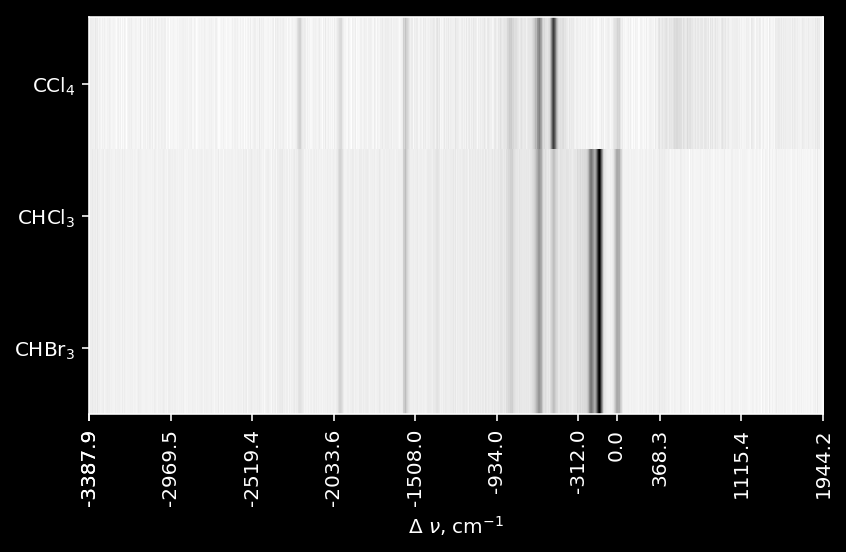

In [66]:
plt.style.use('dark_background')
grid=peaksPix[1:]
sample = [r'CCl$_4$',
r'CHCl$_3$',
r'CHBr$_3$',
r'CDBr$_3$',
r'CDCl$_3$']#list(range(grid.shape[0]))
norm = cm.colors.Normalize(vmax=np.max(grid), vmin=np.min(grid))
plt.imshow(grid, cmap=cm.binary, aspect='auto', norm=norm)
# plt.axvline(1185, color='r', linestyle='dashed')
sample = [r'CCl$_4$',
r'CHCl$_3$',
r'CHBr$_3$',
r'CDBr$_3$',
r'CDCl$_3$']
plt.yticks(range(grid.shape[0]), [f'{i}' for i in sample])
tickRange = list(map(lambda x: int(x), np.linspace(0, len(freqs)- 1, 10))) + [0]
plt.tick_params(axis='x', rotation=90)
plt.tick_params(axis='y')
plt.xticks(tickRange + [1185], np.array([np.round(1e7*(1/i - 1/(632.17)),1) for i in freqs[tickRange]] + [0]))
plt.xlabel(r'$\Delta$ $\nu$, cm$^{-1}$')
plt.tight_layout()
plt.savefig('Polarization_1_0Deg_only_DONE.png', dpi=300)
[r'CCl$_4$',
r'CHCl$_3$',
r'CHBr$_3$',
r'CDBr$_3$',
r'CDCl$_3$']

Isotopic shifts are best known and most widely used in vibration spectroscopy where the shifts are large, being proportional to the ratio of the square root of the isotopic masses. In the case of hydrogen, the "H-D shift" is (1/2)1/2 or 1/1.41. Thus, the (totally symmetric) C-H vibration for CH
4 and CD
4 occur at 2917 cm−1 and 2109 cm−1, respectively.[5] This shift reflects the differing Reduced mass for the affected bonds.

## Calculate the Boltzmann constant from the intensity relations of Stokes- and Antistokes lines of for all samples

In [53]:
def funcLorenz(w, *params):
    y = np.zeros_like(w)
    for i in range(0, len(params), 4):
        dw = params[i]
        b = params[i+1]
        w_0 = params[i+2]
        a = params[i+3]
        y = y + a + dw * b/((w - w_0)**2 + dw**2/4)
    return y

In [200]:
%matplotlib qt

In [201]:
with codecs.open(folder + 'Sample 1, 0 Deg, Green.asc', encoding='utf-8-sig') as f:
        X_test = np.array([[float(x) for x in line.split()] for line in f])
y = X_test[:,1]   
x = X_test[:,0]
# plt.style.use('dark_background')
a=950
b = 1550
plt.plot(x[a:b],y[a:b])
peaks = detect_peaks.detect_peaks(y[a:b], mph=max(y[a:b])/1.3, mpd=15)
guess =[]
for i in range(len(peaks)):
    guess += [1, 180, x[a:b][peaks[i]], 4500]  
popt, pcov = curve_fit(funcLorenz, x[a:b], y[a:b], p0=guess)
perr = np.sqrt(np.diag(pcov)[np.diag(pcov)>0])
print ("OPTIMIZED PARAMETERS: cureveN [dw, b, w_0, a]", popt)
x_play = np.linspace(600,680, 50)
fit = funcLorenz(x_play, *popt)
plt.plot(x_play, fit, 'r-', linewidth = 1)
# plt.xticks(np.array(popt).reshape(5,4)[1:,2])
# yti = funcLorenz(np.array(popt).reshape(5,4)[1:,2], *popt)
# plt.yticks([yti[0]] + [yti[2]] + [yti[1]])
plt.tick_params(rotation=45)
plt.xlabel(r'$\lambda$, nm')
plt.ylabel('counts')
plt.plot(x[a:b][peaks], y[a:b][peaks], 'o')
plt.tight_layout()
plt.savefig('k_boltz_12.png', dpi=300)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/optimize/minpack.py:715: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


OPTIMIZED PARAMETERS: cureveN [dw, b, w_0, a] [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan]


In [55]:
x[a:b][peaks]

array([665.37278, 662.43074, 658.60337, 655.21507, 652.26678, 649.75931,
       646.51241, 643.55878, 640.60334, 638.23768, 635.87087, 632.1704 ,
       628.6153 , 625.65072, 621.05204, 618.08285, 615.26043, 612.73373,
       609.75947, 607.22992, 604.84798, 602.16691, 599.3353 , 596.35289,
       593.96566, 589.78522, 585.15274, 581.26408, 578.57014])

In [56]:
y[a:b][peaks]

array([4969., 5212., 5750., 4941., 4956., 4962., 5338., 4759., 4721.,
       4781., 4729., 4879., 4708., 4747., 4685., 5018., 4872., 4803.,
       4880., 4896., 4865., 4843., 4804., 4798., 4828., 4819., 4802.,
       4762., 4782.])

In [212]:
c*3690

1107000000000.0

In [269]:
1e7/16134.784810126583

619.7789507377723

In [268]:
1e7*1/632 + 312

16134.784810126583

In [270]:
antistokes = 1
stokes = 1
la = 620
ls = 645
c = 3e8
l_vib = 1e-9*632
v_vib=(c/l_vib)
h = (6.62*1e-34)
k = 1.38*1e-23#25 + 273

(h*v_vib/k)*np.log(((stokes/antistokes) *(ls/la)**4))

3600.6350105795977

# yti[1] + yti[2] 

In [58]:
import numpy as np

In [ ]:
632.

In [197]:
antistokes = 1
stokes = 1
ls = #646.51
la = 617.5
c = 3e8
l_vib = 1e-9*632.01
v_vib=(c/l_vib)
h = (6.62*1e-34)
T = 1.38*1e-23

(h*v_vib/T)*np.log(((stokes/antistokes) *(ls/la)**4))

4181.5730132496465

$I_{anti} \over I_{stokes}$ = $4.15 * 10^{-19}$

$\nu_{vib} \sim $ 530 cm$^{-1}$

$\left(\frac{\nu_{\mathrm{a}}}{\nu_{\mathrm{S}}}\right)^{4}$ $\approx$ 1

$$k_{\mathrm{B}}=\frac{h \nu_{\mathrm{vib}}}{T} \cdot \ln \left[\frac{l_{\mathrm{S}}}{l_{\mathrm{a}}} \cdot\left(\frac{\nu_{\mathrm{a}}}{\nu_{\mathrm{S}}}\right)^{4}\right]^{-1}$$

In [60]:
v_vib*1e-12

474.6760336070632

In [182]:
dataFiles = [i for i in os.listdir(folder) if '.asc' in i]
taskFiles = [i for i in dataFiles if 'Green' in i][1:]
taskFiles = [i for i in taskFiles if 'Sample 5' in i]
# taskFiles = taskFiles + ['Sample 4, 0 Deg, Green.asc']

In [183]:
taskFiles

['Sample 5, 0 Deg, Green.asc', 'Sample 5, 90 Deg, Green.asc']

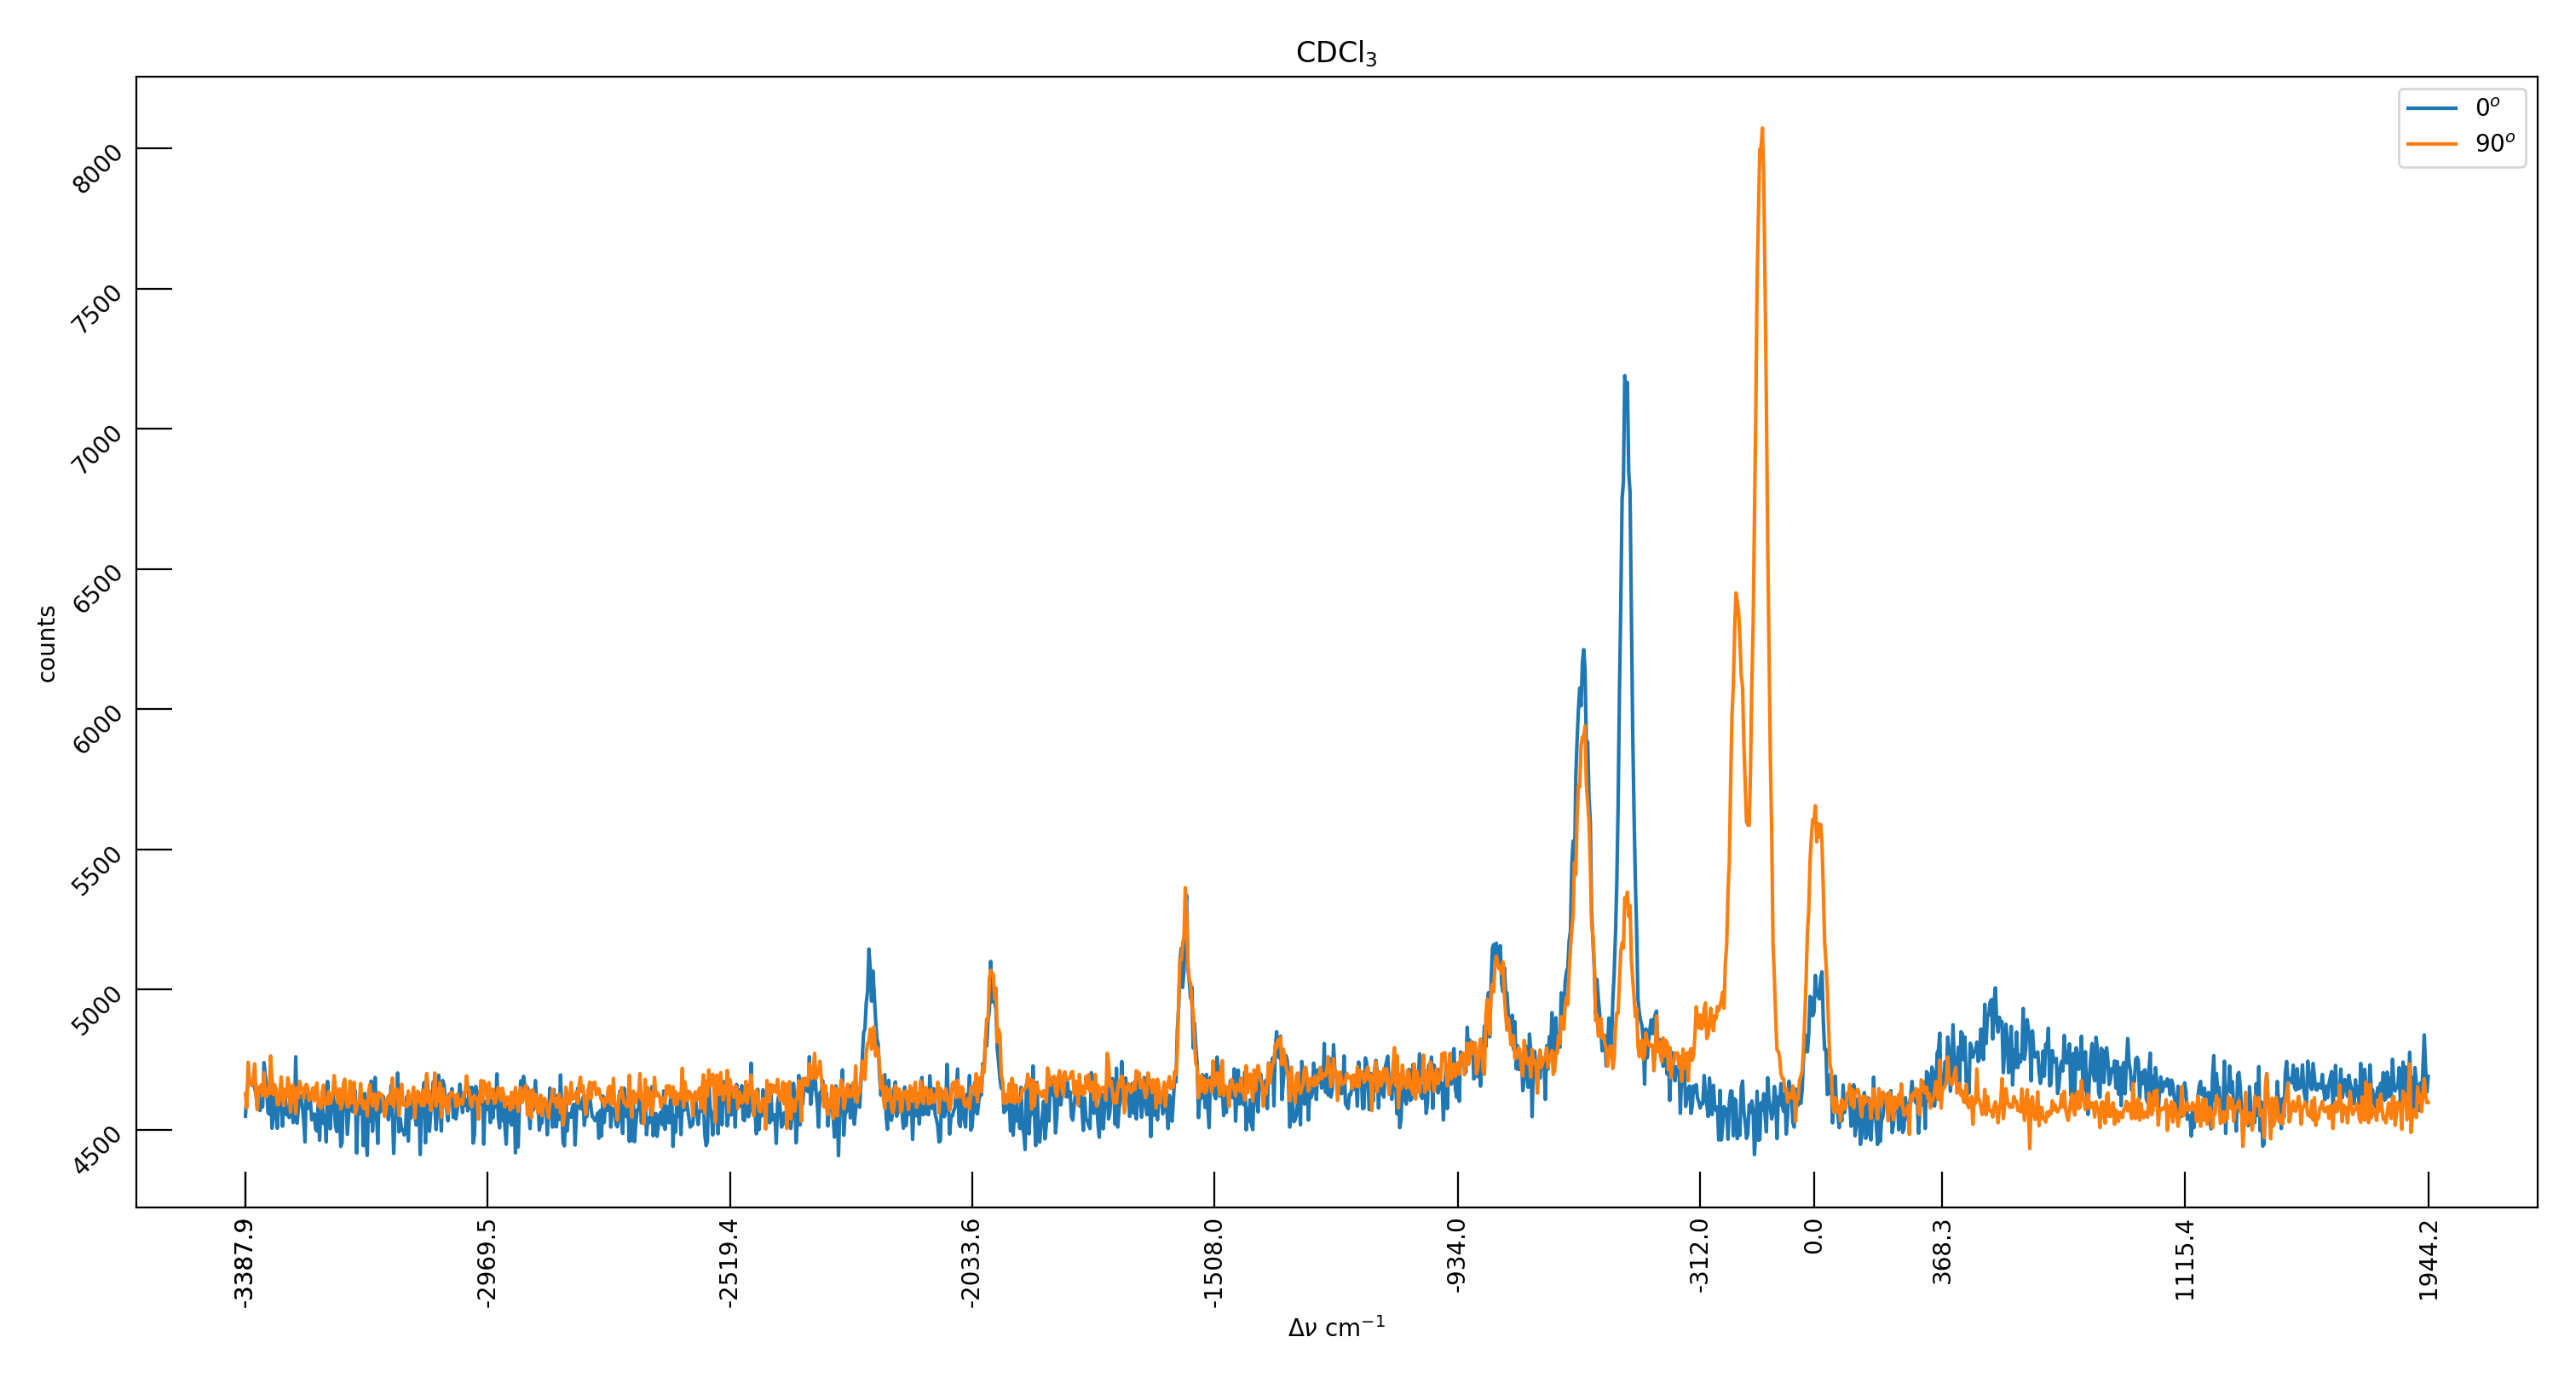

In [196]:
plt.style.use('default')
fig, axs = plt.subplots(1, 1, constrained_layout=True, figsize=(15, 8))
plt.subplots_adjust(hspace=0.5)
plt.xlabel(r'$\Delta \nu$ cm$^{-1}$')
plt.ylabel('counts')
peakMax = [1.6, 1.6]

# b= 1500
peaks=[[],[]]
with codecs.open(folder + taskFiles[0], encoding='utf-8-sig') as f:
        X_test = np.array([[float(x) for x in line.split()] for line in f])
freqs = X_test[:,0]
data_t = X_test[:,1] 
peaksPix = data_t
x = range(len(data_t))
lines = np.array([i in peaks for i in x])
sample = []
for i in taskFiles:
    with codecs.open( folder + i, encoding='utf-8-sig') as f:
        X = np.array([[float(x) for x in line.split()] for line in f])
    freqs = X[:,0]
    data = X[:,1]
    idx_j=int(list(filter(str.isdigit, i))[0]) - 1 
    if " 0 Deg" in i:
        idx=0
    if idx==0:
        lines=data
        peaksPix = np.vstack((peaksPix, lines))
        sample = sample + [idx + 1]
    if " 90 Deg" in i:
        idx=1
    if idx==1:
        lines=data
        peaksPix = np.vstack((peaksPix, lines))
        sample = sample + [idx + 1]
    peaks[idx] = detect_peaks.detect_peaks(data, mph=max(data)/peakMax[idx], mpd=35)
    tickRange = list(map(lambda x: int(x), np.linspace(0, len(freqs)- 1, 10))) + [0]
    subPlot = axs
    subPlot.plot(data, '-')
    
    
#     subPlot.plot(peaks[idx], data[peaks[idx]], 'og')
#     subPlot.xaxis.set_ticks(peaks[idx])
    
    
    subPlot.set_title(r'CDCl$_3$', size=12)
    subPlot.xaxis.set_ticks(tickRange + [1185])
    subPlot.xaxis.set_ticklabels(np.array([np.round(1e7*(1/i - 1/(632.17)),1) for i in freqs[tickRange]] + [0]))
    subPlot.tick_params(axis='both', size=15, rotation=45, direction='in')
    
    subPlot.tick_params(axis='x', rotation=90) 
    
#     subPlot.xaxis.label(r'$\Delta \nu$ cm$^{-1}$')
#     subPlot.xaxis.label('')


plt.legend([r'0$^{o}$',r'90$^{o}$'])
fig.subplots_adjust(top=0.85)
fig.tight_layout()
fig.savefig('polarizzzz.png', dpi=300)
plt.show()

In [64]:
peaks[1]

array([ 563,  710,  945, 1012, 1146, 1186])

In [65]:
guess =[]
for i in range(len(peaks)):
    guess += [1, 200, freqs[peaks[i]], 4500]  
popt, pcov = curve_fit(funcLorenz, x[a:b], y[a:b], p0=guess)
perr = np.sqrt(np.diag(pcov)[np.diag(pcov)>0])
print ("OPTIMIZED PARAMETERS: cureveN [dw, b, w_0, a]", popt)
x_play = np.linspace(610,650, 50)
fit = funcLorenz(x_play, *popt)
plt.plot(x_play, fit, 'r-', linewidth = 1)
    



ValueError: setting an array element with a sequence.

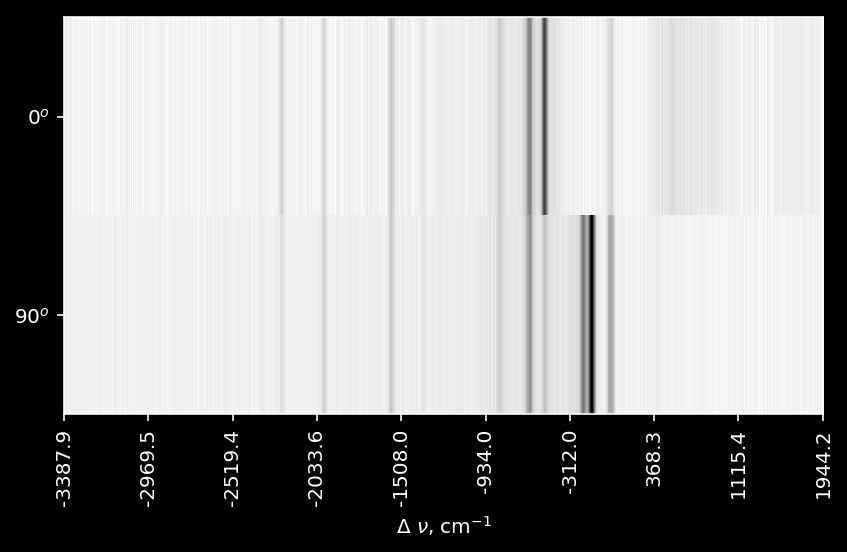

In [71]:
plt.style.use('dark_background')
grid=peaksPix[1:3]
sample = [r'0$^o$',
r'90$^o$']#list(range(grid.shape[0]))
norm = cm.colors.Normalize(vmax=np.max(grid), vmin=np.min(grid))
plt.imshow(grid, cmap=cm.binary, aspect='auto', norm=norm)
# plt.axvline(1185, color='r', linestyle='dashed')
plt.yticks(range(grid.shape[0]), [f'{i}' for i in sample])
tickRange = list(map(lambda x: int(x), np.linspace(0, len(freqs)- 1, 10)))
plt.tick_params(axis='x', rotation=90)
plt.tick_params(axis='y')
plt.xticks(tickRange, np.array([np.round(1e7*(1/i - 1/(632.17)),1) for i in freqs[tickRange]]))
plt.xlabel(r'$\Delta$ $\nu$, cm$^{-1}$')
plt.tight_layout()
plt.savefig('Polarr2d.png', dpi=300)

## Polarizaition 1 

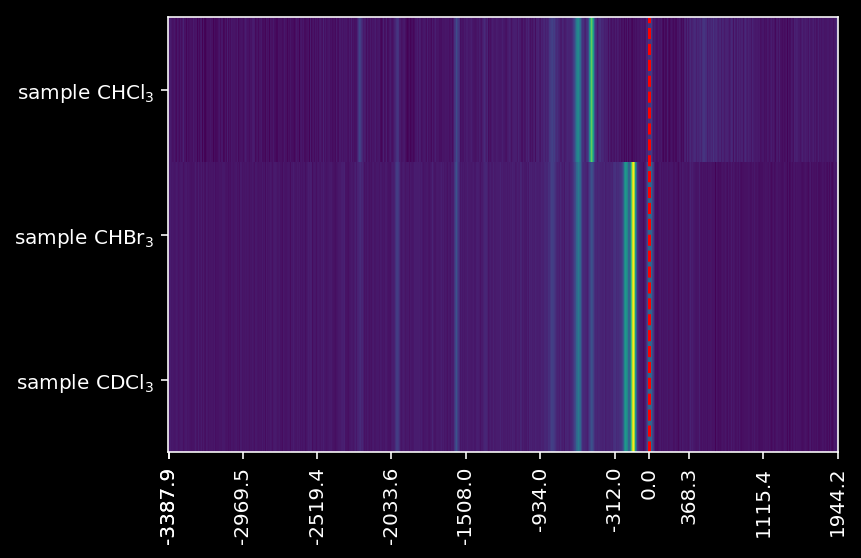

In [67]:
plt.style.use('dark_background')
grid=peaksPix[1:]
sample = ['CHCl$_3$', 'CHBr$_3$', 'CDCl$_3$', 'CH$_2$Cl$_2$']
plt.imshow(grid, cmap=cm.viridis, aspect='auto')#(x.min(), x.max(), y.max(), y.min()),
plt.yticks(range(grid.shape[0]), [f'sample {i}' for i in sample])
xticks=list(np.linspace(0, grid.shape[1], 5)) + [0]
# plt.vlines(shiftX - 3, 0, grid.shape[0]-1, color='r', linestyle='dashed')
plt.axvline(1185, color='r', linestyle='dashed')
tickRange = list(map(lambda x: int(x), np.linspace(0, len(freqs)- 1, 10))) + [0]
plt.xticks(tickRange + [1185], np.array([np.round(1e7*(1/i - 1/(632.17)),1) for i in freqs[tickRange]] + [0]))
plt.tick_params(axis='x', rotation=90) 
# plt.xticks(xticks, np.array(np.array(xticks)))
plt.tick_params(axis='both')   
plt.savefig('Polarization_1.png')

## Polarizaition 2

In [69]:
sample_2
sample_2 = ['CHBr$_3$', 'CHCl$_3$', 'CH$_2$Cl$_2$', 'CDCl$_3$']

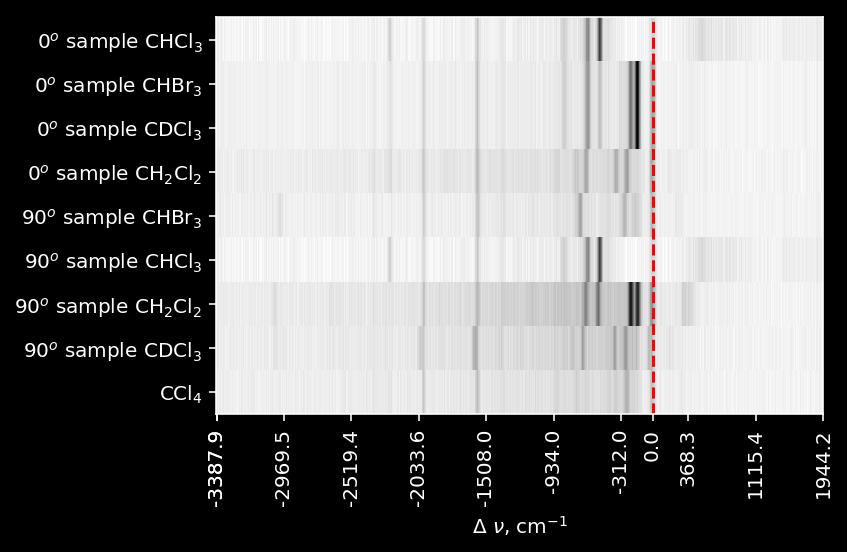

In [70]:

plt.style.use('dark_background')
grid_2=peaksPix_2[1:] - 1
grid_2 = np.vstack((grid, grid_2))
# grid_2 = np.vstack((grid_2, lines_Cl - 2))
plt.imshow(grid_2, cmap=cm.binary, aspect='auto')#(x.min(), x.max(), y.max(), y.min()),
plt.yticks(range(grid_2.shape[0]), [f'$0^o$ sample {i}' for i in sample] + [f'$90^o$ sample {i}' for i in sample_2] + ['CCl$_4$'])
# plt.vlines(shiftX - 3, 0, grid.shape[0]-1, color='r', linestyle='dashed')
xticks=list(np.linspace(0, grid.shape[1], 5)) + [0]
# plt.xticks(xticks, np.array(np.array(xticks) - shiftX)*18)
plt.tick_params(axis='both')
plt.axvline(1185, color='r', linestyle='dashed')
tickRange = list(map(lambda x: int(x), np.linspace(0, len(freqs)- 1, 10))) + [0]
plt.xticks(tickRange + [1185], np.array([np.round(1e7*(1/i - 1/(632.17)),1) for i in freqs[tickRange]] + [0]))
plt.tick_params(axis='x', rotation=90) 
plt.xlabel(r'$\Delta$ $\nu$, cm$^{-1}$')
plt.tight_layout()
plt.savefig(f'Polarization_both_.png', dpi=300)

5 sample has the lowest symmetry => more lines (6) more than others -> CH_2Cl_2

All of 2 - 5 have 5 lines => have the same symmetry 

in sample 3 one line disappeears and another appears when polarization changed

218 314 459

# Blocking filter.
__Defining the Rayleygh freq__

In [ ]:
taskFiles = [i for i in dataFiles if 'B' in i]

In [ ]:
shiftX = 300

In [ ]:
peakMax = [1.2]*len(taskFiles)

data_sample = np.fromfile(folder + dataFiles[0], dtype=float)
peaksPix = data_sample
x = range(len(data_sample))
lines = np.array([i in peaks for i in x])

for idx, i in enumerate(taskFiles):
    data = np.fromfile(folder + i, dtype=float)
    peaks = detect_peaks.detect_peaks(data, mph=max(data)/peakMax[idx], mpd=5)
    lines = np.array([i in peaks for i in x]) - idx/20
    peaksPix = np.vstack((peaksPix, lines))

    
grid=peaksPix[1:]
plt.imshow(grid, cmap=cm.viridis, aspect='auto')#(x.min(), x.max(), y.max(), y.min()),
plt.yticks(range(9), [f'experiment {i}' for i in range(9)])
# plt.vlines(296,0, 7, color='r')
xticks=list(np.linspace(0, 400, 5)) + [0]
plt.xticks(xticks, np.array(xticks) - shiftX)
plt.tick_params(axis='both', colors='red')   
plt.savefig('filtering Reyleigh.png')

In [ ]:
xticks

In [ ]:
plt.style.use('dark_background')
sample = range(grid.shape[0])
grid_2=peaksPix_2[1:]
grid = grid_2
# grid_2 = np.vstack((grid_2, lines_Cl - 2))
norm = cm.colors.Normalize(vmax=np.max(grid), vmin=np.min(grid))
plt.imshow(grid, cmap=cm.rainbow, aspect='auto', norm=norm)#(x.min(), x.max(), y.max(), y.min()),
plt.yticks(range(grid.shape[0]), [f'$90^o$ sample {i + 1}' for i in sample])
plt.axvline(1185, color='r', linestyle='dashed')
tickRange = list(map(lambda x: int(x), np.linspace(0, len(freqs)- 1, 10))) + [0]
plt.xticks(tickRange + [1185], np.array([np.round(1e7*(1/i - 1/(632.17)),1) for i in freqs[tickRange]] + [0]))
plt.tick_params(axis='x', rotation=90) 
plt.tick_params(axis='y')
plt.xlabel(r'$\Delta$ $\nu$, cm$^{-1}$')
# plt.tight_layout()
plt.savefig(f'Polarization_new_.png', dpi=300)